In [364]:
import pandas as pd
import numpy as np
import konlpy
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Okt
import re
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KM

import matplotlib.pyplot as plt
from matplotlib import font_manager
f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False #마이너스 부호로 한글 꺠짐 방지
rc('font', family='Arial Unicode MS')
%matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

okt = Okt()
# komoran=Komoran()
# kkma=Kkma()
# hannanum=Hannanum()

In [2]:
df = pd.read_excel("/Users/young/git/project/export/비전공자 개발자_2023-01-31.xlsx")
df.rename(columns={'Unnamed: 0':'Rank'},inplace=True)


In [3]:
df.tail(5)

,Rank,title,description,author,timestamp
1045,1045,"문과 개발자, 정말 비전공자도 IT 취업이 가능할까?","문과 개발자, 정말 비전공자도 IT 취업이 가능할까? 문과라서 취업할 길이 보이...",그대 미소에 봄이 돼줄게요,2021.09.18.
1046,1046,"자바 개발자 되는 법, 비전공자에게 적합한 과정은?",자바 개발자 되는 법 비전공자에게 맞는 과정 자바 개발자가 되기 위해 비전공자에...,IT교육및취업전문가 융쌤,2022.06.03.
1047,1047,"소프트웨어개발자되는법, 컴공출신 아닌 비전공자 자바웹포폴...",오늘은 컴공전공생이 아닌 비전공자가 #소프트웨어개발자되는법 #웹개발프로젝트 제작...,월요일에 만든 블로그,2022.01.20.
1048,1048,종로자바학원에서 비전공자도 개발자 취업 가능해요!!,종로자바학원에서 비전공자도 개발자 취업 가능해요!! 비전공자분들의 가장 큰 고민...,따봉아빠의 IT 일상,2017.09.08.
1049,1049,(비전공자 공부순서) 개발자가 하고 싶어요.....,그럼에도 불구하고 디지털노마드를 꿈꾸시거나 개발자의 꿈을 갖고 계신 분 혹은.....,초보개발자 _ 왕곰,2022.09.13.


In [4]:
df['structure'] = ''

In [272]:
def pos_seperator(pos):
    #품사
    pos = re.search(('(?<=\/)[a-zA-Z]*'),tup)[0]
    #형태소
    morphs = re.search(('.+(?=\/)'),tup)[0]

def add_scores():
    return 

def word_parser(df):
    morphs_list = []
    phrase_list = []
    structure_list = []
    morphs_only_list = []
    # count_morphs_list = []
    # count_phrase_list = []
    # df 반복문 돌며 어절, 형태소 분해, 문장구조 분해 
    for idx,rows in df.iterrows():
        split_phrases = okt.phrases(rows[1])
        split_morphs = okt.pos(rows[1], join=True)
        morphs_tmp_list = []

        for i in split_phrases:
            phrase_list.append(i + '/' + 'Noun')
        for i in split_morphs:
            if 'Punctuation' in i:
                continue
            morphs_list.append(i)
            morphs_tmp_list.append(re.split(('/'),i)[0])
    #명사 중복 제거 후 구조화
        # tmp_structure = []
        tmp_structure = ''
        for jdx,tup in enumerate(okt.pos(rows[1])):
            if jdx > 0 and tmp == 'Noun' and tup[1] == 'Noun':
                continue
            tmp = okt.pos(rows[1])[jdx][1]
            # structure_list.append(tup[1])
            # tmp_structure += '_' + tup[1] if jdx != 0 or jdx != len(okt.pos(rows[1])) - 1 else tup[1]
            # if jdx != 0:
            #     tmp_structure += '_' + tup[1]
            # else:
            #     tmp_structure += tup[1]
            tmp_structure += '_' + tup[1]
            # structure_list.append([i for i in tup[1]])
        structure_list.append(tmp_structure)
        morphs_only_list.append(morphs_tmp_list)
    #unique값 찾기
    morphs_set = list(set(morphs_list))
    phrase_set = list(set(phrase_list))
    structure_set = list(set(structure_list))
    #빈도 카운트
    print(len(phrase_set))
    for i in range(len(morphs_set)):
        #두 리스트간 중복 삭제
        if morphs_set[i] in phrase_set:
            phrase_set.remove(morphs_set[i])
        morphs_set[i] = morphs_set[i] + '/' + str(morphs_list.count(morphs_set[i]))

    for i in range(len(phrase_set)):
        phrase_set[i] = phrase_set[i] + '_joint/' + str(phrase_list.count(phrase_set[i]))

    for i in range(len(structure_set)):
        structure_set[i] = structure_set[i] + '/' + str(structure_list.count(structure_set[i]))

    df['morphs'] = morphs_only_list
    return phrase_set,morphs_set,structure_set,structure_list

phrase_set,morphs_set,structure_set,structure_list = word_parser(df)



3251


In [6]:
df_orgin_structure = []
for i in structure_list:
    
    split = re.split(('_'),i)
    del split[0]

    df_orgin_structure.append(split)

df['structure'] = df_orgin_structure



In [7]:
#단어 토큰 df화
frame = {
    'word' : [],
    'pos' : [],
    'cnt' : []
}
word_st = phrase_set + morphs_set
for i in word_st:
    try:
        split = re.split(('/'),i)
        # print(split[1],split[2],split[3])
        frame['word'].append(split[0])
        frame['pos'].append(split[1])
        frame['cnt'].append(int(split[2]))
    except:
        # print(i)
        continue

frame
df2 = pd.DataFrame(frame)
df2 = df2.sort_values(by="cnt",ascending=False)
df2

,word,pos,cnt
2956,비,Noun,1063
3098,전공자,Noun,1062
3163,개발자,Noun,1029
306,비전공자,Noun_joint,659
3037,취업,Noun,599
...,...,...,...
1432,강남웹개발자학원 기초 강의,Noun_joint,1
1434,비전공자개발자취업 준비방법,Noun_joint,1
1435,소프트웨어개발 취업 후기,Noun_joint,1
1437,성공의 지름길,Noun_joint,1


In [8]:
# 문장구조 df화
structure_frame = {
    'structure' : [],
    'cnt' : []
}
for i in structure_set:
    split_cnt = re.split(('/'),i)
    cnt = int(split_cnt[-1])
    
    split = re.split(('_'),i)
    del split[0]
    split[-1] = re.split(('/'),split[-1])[0]
    # print(cnt)
    structure_frame['structure'].append(split)
    structure_frame['cnt'].append(cnt)
df3 = pd.DataFrame(structure_frame)
df3 = df3.sort_values(by="cnt",ascending=False)
df3

,structure,cnt
355,[Noun],40
216,"[Noun, Punctuation, Noun]",19
372,"[Noun, Josa, Noun]",18
260,"[Noun, Punctuation]",11
285,"[Noun, Punctuation, Noun, Punctuation]",9
...,...,...
284,"[Noun, Punctuation, Noun, Josa, Noun, Josa, Ve...",1
286,"[Noun, Josa, Noun, Punctuation, Noun, Punctuat...",1
287,"[Noun, Punctuation, Alpha, Noun, Josa, Noun, J...",1
288,"[Noun, Punctuation, Noun, Josa, Noun, Josa, Ve...",1


In [9]:
df3_pop = df3[df3['cnt'] > 1]

for i in range(1):
    sample_structure = random.choices(list(df3_pop['structure']),weights=[i for i in df3_pop['cnt']])[0]



In [10]:
sample_structure_dict = dict.fromkeys(sample_structure)

In [41]:
#문장구조와 단어 조합
def random_choice(sample_list, weight):
    sample = random.choices(sample_list,weights=weight)
    return sample[0]

for pos in sample_structure:
    if pos == 'Noun':
        coin_flip = random_choice(["Noun","Noun_joint"],[0.2,0.8])
        df2_n = df2[df2['pos'] == coin_flip]
    else:
        df2_n = df2[df2['pos'] == pos]
    df2_n.reset_index(drop=False)
    df2_n.sort_values(by='cnt',ascending=False)

    match_senetence = []
    for i,row in df.iterrows():
        if sample_structure == row[5]:
            match_senetence.append(row[1])

    words = []
    
    for i in range(10):
        if pos == 'Punctuation':
            sample = random_choice(["?","!","??","!!"],[1,1,1,1])

        else:
            sample = random_choice(list(df2_n['word']),[i for i in df2_n['cnt']])

        words.append(sample)
    sample_structure_dict[pos] = words

print(sample_structure)
print(match_senetence)
print(sample_structure_dict)

['Noun', 'Punctuation', 'Noun', 'Verb', 'Verb', 'Adjective', 'Noun']
['코딩 개발자 - 비전공자 취업 준비전 읽어보면 좋은 글', '웹개발학원 , 비전공자 도 개발자 가 될수 있는 방법']
{'Noun': ['자바개발자부트캠프 비전공자취업대비반 6개월완성', '비전공자', '비전공자개발자', '취업 성공', '비전공자 취업', '서울아이티국비지원', '비전공자 프로그래밍', '비전공자', '개발자취업학원 비전공자', '비전공자 개발자 취업 전문 학원 추천'], 'Punctuation': ['?', '!', '!', '!!', '!!', '?', '??', '!!', '!!', '??'], 'Verb': ['될은', '되는', '만드는', '듣는', '모셔', '할', '할', '할', '하기', '하기'], 'Adjective': ['가능하다', '가능해', '가능할까', '가능한', '있을까', '가능해요', '뿐입니다', '있을까', '있는', '아님']}


In [42]:
#꼬리물기를 위한 key-value 생성
tester = list(df['title'])
# tester = ['자바개발자취업 비전공자 교육 과정 안내!']

word_key = []
word_joint = []
for i in tester:
    x = 0
    pos = okt.pos(i)
    # word_joint.append([j[0] for j in pos])
    while True:
        words = ''
        for j in range(x,len(pos)):
            if pos[j][1] == 'Punctuation':
                continue
            words += pos[j][0]
            # if j == x:
            #     word_key.append(words)
            #     continue
            # else:
            #     word_joint.append(words)
            if j != x:
                word_key.append(pos[x][0])
                word_joint.append(words)
        x += 1
        if x == len(pos):
            break;
    
    
word_joint_aggregate = dict.fromkeys(word_key)
df_following_word = pd.DataFrame(word_joint,index=word_key,columns=['word'])

df_unique_counter = pd.DataFrame(df_following_word['word'].value_counts())
df_unique_counter.rename(columns={"word":"count"},inplace=True)
df_unique_counter['word'] = df_unique_counter.index
df_following_word['key'] = df_following_word.index
df_following_word.drop_duplicates(inplace=True)
df_word_joint = pd.merge(df_following_word,df_unique_counter,left_on='word',right_on='word',how='inner')
df_word_joint = df_word_joint[['key','word','count']]

df_word_joint


,key,word,count
0,비,비전공자,1370
1,:,비전공자,1370
2,-,비전공자,1370
3,",",비전공자,1370
4,(,비전공자,1370
...,...,...,...
42823,),개발자가하고싶어요,2
42824,개발자,개발자가하고싶어요,2
42825,가,가하고,1
42826,가,가하고싶어요,1


In [238]:
#꼬리물기를 위한 key-values 등장 확률 계산
unique_starter = list(set(list(df_word_joint['key'])))
df_odds = pd.DataFrame()
num = 0

for starter in unique_starter:

    df_pieces = df_word_joint[df_word_joint['key'] == starter]
    df_pieces['odds'] = df_pieces['count']/df_pieces['count'].sum()

    if num != 0:
        df_odds = pd.concat([df_odds,df_pieces])
    else:
        df_odds = df_pieces
    num += 1


/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [389]:
#꼬리물기 문장 생성 진행 기능
def create_sentence(starter):
    starter = starter
    tmp_forward = []

    for i in range (15):
        if True not in list(df_word_joint['key'].isin([starter])):
            starter = okt.morphs(starter)[-1]
            if True not in list(df_word_joint['key'].isin([starter])):
                starter = starter.strip()[-1]

        df_draw = df_odds[df_odds['key'] == starter].sort_values(by='odds',ascending=False)

        draw_words = list(df_draw.head(5).iloc[:,1])
        draw_odds = list(df_draw.head(5).iloc[:,3])
        draw = random_choice(draw_words,draw_odds)

        if len(tmp_forward) == 0:
            tmp_forward.append(starter)
        if len(tmp_forward) > 0:
            element = draw.lstrip(tmp_forward[-1])
            if element == '':
                tmp_forward.append(draw)
            else:
                tmp_forward.append(element)
        # tmp_forward.append(draw)

        starter = draw.lstrip(starter)

    return tmp_forward

거리 계산 단계. 발사된 포탄이 어떤 군집과 가장 가까운가?

In [482]:
#tf idf 계산



# #문장 띄워쓰기 위주
# title = []
# for i in list(df['title']):
#     title.append(i)

title = []
for sentence in list(df['morphs']):
    title.append(" ".join(sentence))

vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(title)


countervect = sp_matrix.toarray()
countetvect_df = pd.DataFrame(countervect,columns=sorted(vectorizer.vocabulary_))
countetvect_df.index = df.index

cosine_similarity(countetvect_df,countetvect_df)
countervect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [509]:
title

['비 전공자 개발자 준비 하기 적합한 케이스 및 취업률 높이기',
 '코딩 개발자 취업 비 전공자 의 가능성 과 연봉 알아보기',
 '코딩 개발자 비 전공자 취업 현실',
 '자바 개발자 비 전공자 취업 성공 의 지름길',
 '비 전공자 개발자 학원 에서 취업 성공한 후기',
 '비 전공자 개발자 협업 모두 에 유용한 책 코딩 IT 지식 사전',
 '비 전공자 수강생 의 개발자 국비 지원 학원 수강 후기 자바',
 '30 대 개발자 취업 이직 비 전공자 도 정말 가능할까 요',
 '비 전공자 개발자 의 독서 역행 자 자청',
 '비 전공자 백엔드 개발자 취업 학원',
 'IT 개발자 비 전공자 취업 모두 가 대기업 에 갈 수 는 없다',
 '비 전공자 자바 웹개발자 교육 취업 후기',
 '자바 개발 취업 비 전공자 개발자 준비',
 '비 전공자 개발자 연봉 및 현실 적 으로 취업 이 가능한 직무',
 '비 전공자 개발자 초봉 3600만 원 으로 시작 하는 방법',
 '카카오 개발자 비 전공자 로 취업 을 준비 하는 방법',
 '개발자 가 되고 싶다 비 전공자 취업 로드맵',
 '자바 프로그래머 비 전공자 개발자 를 위 한 취업 공부',
 '비 전공자 개발자 를 위 한 청년 취업 사관학교 데이터 분석 전문가',
 '비 전공자 개발자 공장 찍어내기 식이 아닌 개별 학습 설계 로',
 '비 전공자 도 개발자 가 될 수 있나요 광주 코딩 학원',
 '비 전공자 개발자 취업 불가능 이란 없다',
 '비 전공자 개발자 되는 법 차근차근 공부 하는 것 이 성공 의 지름길',
 '비 전공자 개발자 메리트 있는 취업 대비 방법 은',
 '빅데이터 개발자 비 전공자 효율 적 인 취업 방법',
 '비 전공자 개발자 학원 공부 가이드',
 '비 전공자 개발자 의 독서 초 예측 유발 하라 리 외',
 '백엔드 개발자 연봉 그리고 비 전공자 취업 가능성',
 '문과 개발자 비 전공자 에게 중요한 회사 선택 part 2',
 '비 전공자 개발자 IT 국비 지원 과정 을 통해 취업 하는

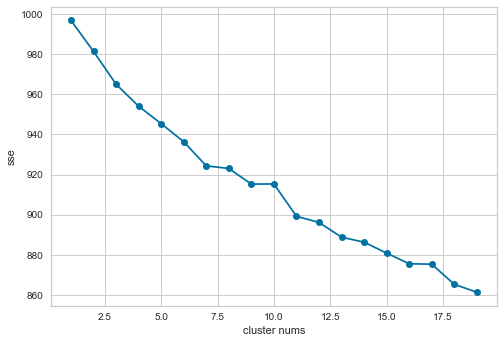

In [455]:
def elbow(x):
    sse = []
    for i in range(1,20):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
        kmeans.fit(x)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,20),sse,marker='o')
    plt.xlabel('cluster nums')
    plt.ylabel('sse')
    plt.show()

elbow(sp_matrix)

In [426]:
cluster_num = 7
kmeans = KMeans(n_clusters=cluster_num, max_iter=10000, random_state=42)
cluster_label = kmeans.fit_predict(sp_matrix)

df['cluster'] = cluster_label

In [449]:
aa = pd.DataFrame(kmeans.cluster_centers_[2],columns=['val'])
aa[aa['val'] > 0.1]

,val
137,0.102886
560,0.112266
631,0.328712
785,0.100884
841,0.125516
1032,0.323085
1053,0.314373


In [536]:
df[df['cluster']==4]

,Rank,title,description,author,timestamp,structure,morphs,cluster
4,4,비전공자개발자 학원에서 취업성공한 후기,"있는 비전공자분들 비전공자개발자 취업을 준비한다면, 이미 비슷한 조건과 상황.....",할일은 없지만 놀기만하지않ㅇ,2022.12.08.,"[Noun, Josa, Noun, Adjective, Noun]","[비, 전공자, 개발자, 학원, 에서, 취업, 성공한, 후기]",4
9,9,비전공자 백엔드 개발자 취업 학원,비전공자 백엔드개발자 취업 학원을 주제로 관련 내용들을 적어보겠습니다. 비전공자...,난 할 수 있다,2022.09.01.,[Noun],"[비, 전공자, 백엔드, 개발자, 취업, 학원]",4
20,20,비전공자도 개발자가 될 수 있나요? - 광주코딩학원,아니어도 개발자로 취업할 수 있는 방법 알려드릴게요 #비전공자개발자취업... 알...,ssodayz❤️,6일 전,"[Noun, Josa, Noun, Josa, Verb, Noun, Adjective...","[비, 전공자, 도, 개발자, 가, 될, 수, 있나요, 광주, 코딩, 학원]",4
25,25,비전공자 개발자 학원 : 공부 가이드!,반갑습니다 ^_^ 비전공자 개발자 학원! KG에듀원 아이티뱅크 IT교육멘토......,민트초코송이,2022.07.27.,"[Noun, Punctuation, Noun, Punctuation]","[비, 전공자, 개발자, 학원, 공부, 가이드]",4
44,44,"부산코딩학원-문과생, 비전공자 개발자 진입이 걱정이라면 보세요",했던 개발자 현재 비전공자의 수요가 늘어나며 문과 전공 학생들 또한 컴퓨터공학과...,IT 정보통,2022.07.04.,"[Noun, Punctuation, Noun, Punctuation, Noun, J...","[부산, 코딩, 학원, 문과, 생, 비, 전공자, 개발자, 진입, 이, 걱정, 이,...",4
...,...,...,...,...,...,...,...,...
1013,1013,백엔드개발자교육 비전공자 취업 전문 학원 추천!!!,생각보다 많은 과목들이 있고 스스로 독학으로 모든 학습과정을 밟아 나가는게 쉽지...,꾸꾸한날씨가 최고,2022.04.13.,"[Noun, Punctuation]","[백엔드, 개발자, 교육, 비, 전공자, 취업, 전문, 학원, 추천]",4
1021,1021,백엔드개발자교육 비전공자 취업 전문 학원 추천!!!,생각보다 많은 과목들이 있고 스스로 독학으로 모든 학습과정을 밟아 나가는게 쉽지...,꾸꾸한날씨가 최고,2022.04.13.,"[Noun, Punctuation]","[백엔드, 개발자, 교육, 비, 전공자, 취업, 전문, 학원, 추천]",4
1028,1028,강남개발자취업학원 비전공자가 개발자로 취업? [IT...,개발자가 되고싶다고 ?!강남개발학원 ★ 취업능력을 키우려면 >> 전문대학 및 대...,jengall44님의블로그,2022.10.11.,"[Noun, Josa, Noun, Josa, Noun, Punctuation, Pu...","[강남, 개발자, 취업, 학원, 비, 전공자, 가, 개발자, 로, 취업, IT]",4
1038,1038,분당프로그래밍학원에서 비전공자 프로그래밍배워 개발자로...,저처럼 비전공자 이신데도 개발자로 취업하시고 싶으신 분들께 분당프로그래밍학원 추...,찬란한 햇살 그늘아래,2021.07.22.,"[Noun, Josa, Noun, Verb, Noun, Josa, Punctuation]","[분당, 프로그래밍, 학원, 에서, 비, 전공자, 프로그래밍, 배워, 개발자, 로]",4


In [556]:
sen = '문과생 비전공자가 개발자 비전공자도 개발자가될수 있는 이유'
# sen = re.split(('\s'),sen)
sen2 = okt.morphs(sen)
tester = [0 for i in range(len(countervect[0]))]

for i in test:
    # print(i)
    if i in vectorizer.vocabulary_:
        # print(vectorizer.vocabulary_.get(i))
        pass
# if '비전공자' in vectorizer.vocabulary_:
#     print(1)

sp = vectorizer.fit_transform(test)
len(countervect[0])



if '비전공자' in vectorizer.vocabulary_:
    print(1)
# if '000만' in countetvect_df.columns:
#     print(1)
# kmeans.predict(sp)

1


In [530]:
# new_post = ['월세를 두 번 이상 연체 하면 방을 빼셔야합니다.']
test = []
for i in list(df['title']):
    # okt.morphs(i)
    pos = okt.morphs(i)
    sentence = ''
    for p in pos:
        sentence = sentence + ' ' + p
    
    test.append(sentence)
test


[' 비 전공자 개발자 : 준비 하기 적합한 케이스 및 취업률 높이기',
 ' 코딩 개발자 취업 비 전공자 의 가능성 과 연봉 알아보기',
 ' 코딩 개발자 비 전공자 취업 현실',
 ' 자바 개발자 : 비 전공자 , 취업 성공 의 지름길',
 ' 비 전공자 개발자 학원 에서 취업 성공한 후기',
 ' 비 전공자 , 개발자 협업 모두 에 유용한 책 코딩 IT 지식 사전',
 ' 비 전공자 수강생 의 개발자 국비 지원 학원 수강 후기 : 자바 ...',
 ' 30 대 개발자 취업 , 이직 비 전공자 도 정말 가능할까 요 ?',
 ' 비 전공자 개발자 의 독서 [ 역행 자 - 자청 ]',
 ' 비 전공자 백엔드 개발자 취업 학원',
 ' IT 개발자 비 전공자 취업 - 모두 가 대기업 에 갈 수 는 없다 .',
 ' 비 전공자 자바 웹개발자 교육 & 취업 후기',
 ' 자바 개발 취업 비 전공자 개발자 준비',
 ' 비 전공자 개발자 : 연봉 및 현실 적 으로 취업 이 가능한 직무',
 ' 비 전공자 개발자 초봉 3600만 원 으로 시작 하는 방법',
 ' 카카오 개발자 비 전공자 로 취업 을 준비 하는 방법',
 ' 개발자 가 되고 싶다 - 비 전공자 취업 로드맵',
 ' 자바 프로그래머 비 전공자 개발자 를 위 한 취업 공부',
 ' 비 전공자 개발자 를 위 한 청년 취업 사관학교 데이터 분석 전문가 ...',
 ' 비 전공자 개발자 ? 공장 찍어내기 식이 아닌 개별 학습 설계 로 ...',
 ' 비 전공자 도 개발자 가 될 수 있나요 ? - 광주 코딩 학원',
 ' 비 전공자 개발자 취업 : 불가능 이란 없다 .',
 ' 비 전공자 개발자 되는 법 , 차근차근 공부 하는 것 이 성공 의 지름길',
 ' 비 전공자 개발자 메리트 있는 취업 대비 방법 은 ?',
 ' 빅데이터 개발자 : 비 전공자 효율 적 인 취업 방법',
 ' 비 전공자 개발자 학원 : 공부 가이드 !',
 ' 비 전공자 개발자 의 독서 [ 초 예측 - 유발 하라 리 외 ]',
 ' 백엔드 개